# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\User\AppData\Local\Temp\ipykernel_31856\1077404222.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv('real_estate_data.csv', '\t')


    total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00   

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

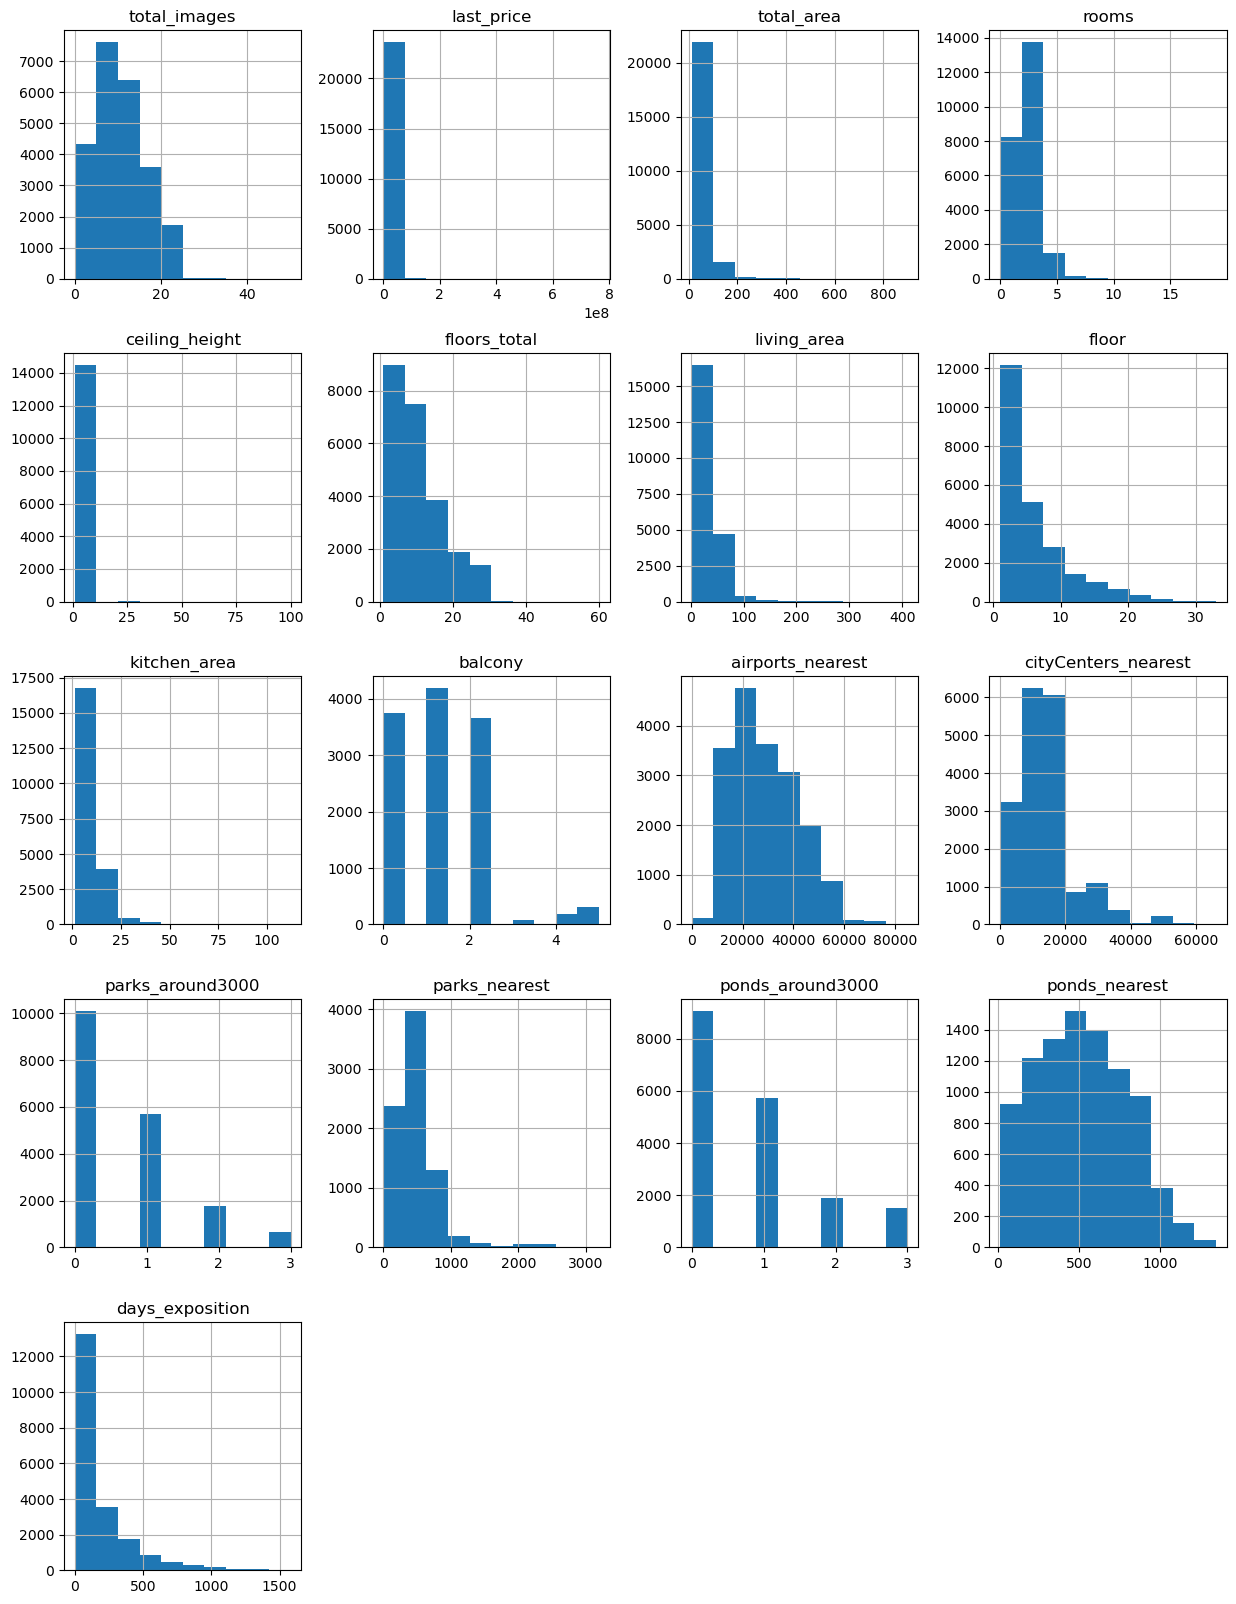

In [3]:
data = pd.read_csv('real_estate_data.csv', '\t')
print(data.head(15))

data.hist(figsize=(15, 20))

### Предобработка данных

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [3]:
data['floors_total'] = data['floors_total'].fillna(1)

med_livarea = data['living_area'].median()
data['living_area'] = data['living_area'].fillna(med_livarea)

med_kitarea = data['kitchen_area'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(med_kitarea)

med_height = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(med_height)

data['balcony'] = data['balcony'].fillna(0)

mean_airports = data['airports_nearest'].mean()
data['airports_nearest'] = data['airports_nearest'].fillna(mean_airports)

mean_cityCenters = data['cityCenters_nearest'].mean()
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(mean_cityCenters)

data['parks_around3000'] = data['parks_around3000'].fillna(0)

median_parks = data['parks_nearest'].median()
data['parks_nearest'] = data['parks_nearest'].fillna(median_parks)

median_ponds = data['ponds_around3000'].median()
data['ponds_around3000'] = data['ponds_around3000'].fillna(median_ponds)

median_ponds_nearest = data['parks_nearest'].median()
data['ponds_nearest'] = data['ponds_nearest'].fillna(median_ponds_nearest)

median_days = data['days_exposition'].median()
data['days_exposition'] = data['days_exposition'].fillna(median_days)

print(data.head(10))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1            2.65          11.0        18.60      1          NaN  ...   

#укажите причины, которые могли привести к пропускам в данных.

#Ответ: Пропущенные значения имеются в столбце ,,balcony,, что значит, что в квартире нет балкона
#Пропуски в столбце ,,days_exposition,, могут означать, что объявление о продаже квартиры ещё не снято.

Заменил пропуски в столбце этажности на 1.

In [4]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['ceiling_height'] = pd.to_numeric(data['ceiling_height'],errors='coerce')  
data['floors_total'] = data['floors_total'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')
data['last_price'] = data['last_price'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

#поясните, почему нужно изменить тип данных.

#Ответ: тип данных был изменён в столбцах 'first_day_exposition', 'ceiling_height',  'floors_total', 'is_apartment', 'balcony' 
#так как их типы не соответствовали данным таблицы, например, этажность здания была строковой, хотя должна быть числовой.

Да, с копейками не продают), не заметил, теперь исправил)

In [5]:
dup_mur = ['посёлок Мурино', 'поселок Мурино']
name_mur = 'Мурино'

dup_pav = ['городской посёлок Павлово', 'посёлок городского типа Павлово']
name_pav = 'село Павлово'

dup_ryb = ['поселок Рябово', 'поселок городского типа Рябово', 'посёлок городского типа Рябово']
name_ryb = 'посёлок Рябово'

dup_ros = ['поселок городского типа Рощино', 'городской посёлок Рощино']
name_ros = 'посёлок городского типа Рощино'

data['locality_name'] = data['locality_name'].replace(dup_mur, name_mur)
data['locality_name'] = data['locality_name'].replace('поселок Новый Свет', 'посёлок Новый Свет')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].replace('поселок Бугры', 'посёлок Бугры')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Красный Бор', 'посёлок городского типа Красный Бор')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Кузьмоловский', 'посёлок городского типа Кузьмоловский')
data['locality_name'] = data['locality_name'].replace(dup_pav, name_pav)
data['locality_name'] = data['locality_name'].replace('поселок городского типа Вырица', 'посёлок городского типа Вырица')
data['locality_name'] = data['locality_name'].replace('поселок Аннино', 'посёлок Аннино')
data['locality_name'] = data['locality_name'].replace(dup_ryb, name_ryb)
data['locality_name'] = data['locality_name'].replace('городской поселок Янино-1', 'городской посёлок Янино-1')
data['locality_name'] = data['locality_name'].replace('поселок Лисий Нос', 'посёлок Лисий Нос')
data['locality_name'] = data['locality_name'].replace(dup_ros, name_ros)
data['locality_name'] = data['locality_name'].replace('поселок городского типа Лесогорский', 'городской посёлок Лесогорский')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Токсово', 'посёлок городского типа Токсово')
data['locality_name'] = data['locality_name'].replace('поселок Кобралово', 'посёлок Кобралово')
data['locality_name'] = data['locality_name'].replace('поселок Любань', 'Любань')
data['locality_name'] = data['locality_name'].replace('поселок Усть-Луга', 'посёлок Усть-Луга')
data['locality_name'] = data['locality_name'].replace('поселок Тельмана', 'посёлок Тельмана')

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
22869             0    15000000        25.0           2018-07-25      1   
3148             14     2900000        75.0           2018-11-12      3   
22336            19     9999000        92.4           2019-04-05      2   
21377            19     4900000        42.0           2017-04-18      1   
4876              7     3000000        25.0           2017-09-27      0   
17857             1     3900000        56.0           2017-12-22      3   
5246              0     2500000        54.0           2017-10-13      2   
20478            11     8000000        45.0           2017-07-18      1   
22938            14     4000000        98.0           2018-03-15      4   
5807             17     8150000      

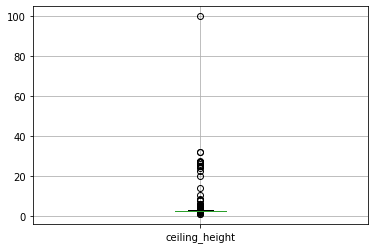

In [6]:
#Проверяем иначальные данные столбца 'ceiling_height', строим диаграмму размаха 

print(data['ceiling_height'].describe())
data.boxplot('ceiling_height')
print(data.sort_values('ceiling_height', ascending = False).head(10))
print(data.query('ceiling_height < 100 and ceiling_height >= 2.5').sort_values('ceiling_height', ascending = False).head(10))

count    23699.000000
mean     28793.672193
std      11055.741355
min          0.000000
25%      21183.000000
50%      28793.672193
75%      34327.000000
max      84869.000000
Name: airports_nearest, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
9640              8     4200000        51.4           2014-12-10      2   
5340             19     3600000        50.6           2019-03-19      2   
577               7     4000000        59.0           2017-07-23      3   
20746             1     3300000        43.5           2016-02-16      2   
5218             15     3650000        53.8           2018-09-24      3   
18884            15     3600000        57.6           2019-02-08      3   
2974             13     3200000        46.3           2018-03-31      2   
4441              6     2300000        31.0           2016-05-26      1   
939              17     3015000        31.2           2019-04-16      1   
376              18     8400000    

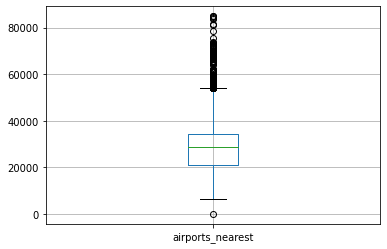

In [7]:
#Группируем датафрейм по убыванию стостолбца 'airports_nearest', строим диаграмму размаха
#По моему мнению значения этого столбца не аномальны, максимальное значение = 84 км с копейками вполне возможно в качестве расстояния до аэропорта Пулково  

print(data['airports_nearest'].describe())
data.boxplot('airports_nearest')
print(data.sort_values('airports_nearest', ascending = False).head(10))

count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
15152             9    10200000       70.60           2018-11-14      2   
19525            17     8370000       64.40           2019-02-19      2   
3344             27    23500000      134.00           2017-11-10      4   
17526            13    11000000       73.90           2019-03-31      2   
3335             12     6700000       73.40           2017-10-19      3   
16196            13     6925000       67.20           2017-03-25      2   
17520            12    11500000       95.00           2017-02-14      1   
17519             6    16471698      133.40           2018-08-23      3   
19504            13     4600000       59.00           2018-08-10      3   
17515             6    20345000      151.17 

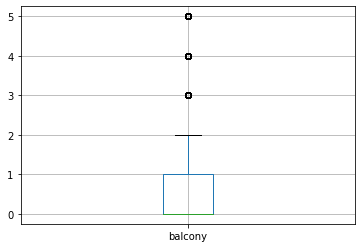

In [8]:
#Проверяем иначальные данные столбца 'balcony', строим диаграмму размаха

print(data['balcony'].describe())
data.boxplot('balcony')
print(data.sort_values('balcony', ascending = False).head(10))
print(data.query('balcony < 3').sort_values('balcony', ascending = False).head(10))

count    23699.000000
mean     14191.277833
std       7539.644870
min        181.000000
25%      10927.000000
50%      14191.277833
75%      15248.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
9640              8     4200000        51.4           2014-12-10      2   
5340             19     3600000        50.6           2019-03-19      2   
577               7     4000000        59.0           2017-07-23      3   
20746             1     3300000        43.5           2016-02-16      2   
5218             15     3650000        53.8           2018-09-24      3   
18884            15     3600000        57.6           2019-02-08      3   
2974             13     3200000        46.3           2018-03-31      2   
16569            13     3200000        52.8           2017-06-20      2   
23123             0     1800000        32.0           2018-07-17      1   
4441              6     2300000 

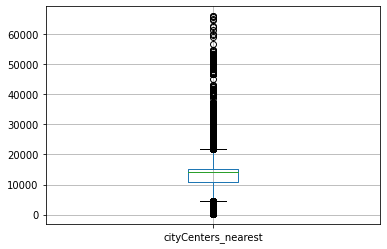

In [9]:
print(data['cityCenters_nearest'].describe())
data.boxplot('cityCenters_nearest')
print(data.sort_values('cityCenters_nearest', ascending = False).head(20))

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
18218             4     9900000      101.00           2018-09-27      3   
11575             9     9900000      101.00           2016-04-28      3   
18629            20     5700000       54.00           2017-12-08      1   
1917             13    10150000       74.00           2017-11-17      2   
11079            16     9200000       75.00           2019-02-22      2   
397              15     5990000       54.00           2018-03-22      2   
8496             20     7500000       73.30           2017-05-18      3   
16644             2     4538000       57.37           2018-02-28      2   
12888             7     7600000       70.00           2016-11-18      3   
6157              9     2990000       33.30   

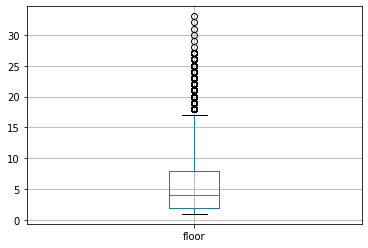

In [10]:
print(data['floor'].describe())
data.boxplot('floor')
print(data.sort_values('floor', ascending = False).head(20))

#Значения в этом столбце выгледят правдиво, так как в Санкт-Петербурге есть дома с этажностью > 30 этажей

count    23699.000000
mean        10.638719
std          6.610834
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
2253             12     3800000        45.5           2018-06-28      2   
16731             9     3978000        40.0           2018-09-24      1   
16934             5     4100000        40.0           2017-10-17      1   
11079            16     9200000        75.0           2019-02-22      2   
5807             17     8150000        80.0           2019-01-09      2   
397              15     5990000        54.0           2018-03-22      2   
22946            14     7690000        75.0           2018-03-27      2   
20938            18     9900000       100.9           2019-04-08      3   
2966              9     4300000        37.0           2017-08-08      1   
1060             10     5200000        

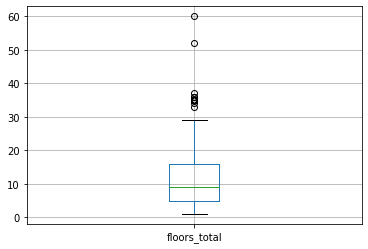

In [11]:
print(data['floors_total'].describe())
data.boxplot('floors_total')
print(data.sort_values('floors_total', ascending = False).head(20))
print(data.query('floors_total < 36').sort_values('floors_total', ascending = False).head(10))

#Удалим значения в столбце, которые > 35 этажей

count    23699.000000
mean        34.099892
std         21.162096
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
19540             8   420000000       900.0           2017-12-06     12   
5358             20    65000000       590.0           2019-02-14     15   
12401            20    91500000       495.0           2017-06-19      7   
4237              1    50000000       517.0           2017-10-14      7   
12859            20   140000000       631.2           2019-04-09      7   
660               3    49950000       483.9           2017-10-04      7   
8018             20    84000000       507.0           2015-12-17      5   
14088             8    51000000       402.0           2017-02-07      6   
20273            12    20000000       460.8           2019-03-20      6   
22494             7    91075000       49

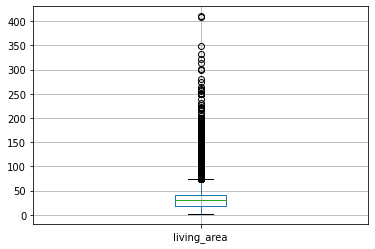

In [12]:
print(data['living_area'].describe())
data.boxplot('living_area')
print(data.sort_values('living_area', ascending = False).head(20))
print(data.query('living_area < 150 and living_area > 25').sort_values('living_area', ascending = False).head(10))

count    23699.000000
mean        10.428526
std          5.631126
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
19540             8   420000000       900.0           2017-12-06     12   
20215             2    85000000       249.7           2018-02-01      3   
2489              9    12500000       255.0           2017-04-21      3   
5358             20    65000000       590.0           2019-02-14     15   
16239             5    82400000       181.1           2017-05-24      3   
16797             9    65850000       146.0           2017-07-14      2   
10867             1    56844500       177.9           2015-01-15      3   
492              18    95000000       216.0           2017-12-05      4   
4394             20    57000000       174.0           2015-11-09      3   
14644            17    47000000       1

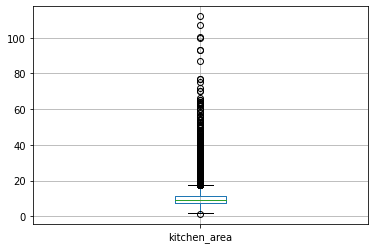

In [13]:
print(data['kitchen_area'].describe())
data.boxplot('kitchen_area')
print(data.sort_values('kitchen_area', ascending = False).head(20))
print(data.query('kitchen_area < 25 and kitchen_area > 3').sort_values('kitchen_area', ascending = False).head(10))

count    23699.000000
mean         0.469049
std          0.748534
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
18443            19     9500000       97.00           2017-08-31      2   
16654            18     4700000       40.00           2018-03-01      1   
5979              0     2490000       34.00           2018-02-08      1   
16539             0     2600000       31.00           2016-05-26      1   
16543            15    26750000      107.00           2017-02-02      3   
16559            16     8350000       75.68           2017-12-29      3   
8010             20    27600000      130.00           2017-01-25      3   
857              14     8260000       91.00           2018-03-29      4   
2744              5    10000000      100.40           2018-07-10      3   
16625            17     6900000    

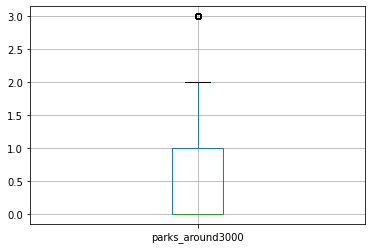

In [14]:
print(data['parks_around3000'].describe())
data.boxplot('parks_around3000')
print(data.sort_values('parks_around3000', ascending = False).head(20))

count    23699.000000
mean       467.205789
std        200.579309
min          1.000000
25%        455.000000
50%        455.000000
75%        455.000000
max       3190.000000
Name: parks_nearest, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
19430             9     3900000       30.50           2018-02-22      1   
10959             9     3000000       31.10           2017-03-21      1   
1590              3     7500000       70.00           2017-07-11      2   
19208            17    14950000      187.00           2017-10-12      5   
23080            15     4650000       44.50           2018-02-20      2   
2659              9    19150000      104.90           2017-08-28      3   
1860             19     3500000       45.00           2016-12-05      2   
7855             16     5200000       44.90           2019-03-04      2   
3865             20    11900000       91.20           2018-10-04      3   
22003             9    14166000       

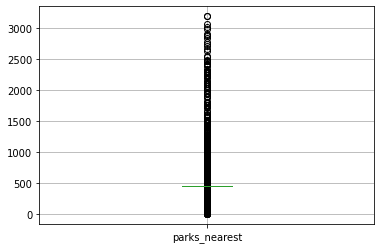

In [15]:
print(data['parks_nearest'].describe())
data.boxplot('parks_nearest')
print(data.sort_values('parks_nearest', ascending = False).head(20))

count    23699.000000
mean         0.823748
std          0.827588
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
11849             8     3700000       55.80           2017-03-03      3   
1697             11     3550000       28.00           2018-02-08      1   
12840            11     5650000       66.00           2015-11-18      2   
12841             4     5150000       41.00           2017-05-04      1   
1719             12     4200000       38.00           2018-02-12      1   
12846             5     4300000       80.60           2016-04-07      3   
12865            19    75000000      189.00           2017-12-14      4   
12871            20     9100000       72.00           2018-09-15      3   
12877            10     5700000       50.20           2018-01-22      1   
12888             7     7600000    

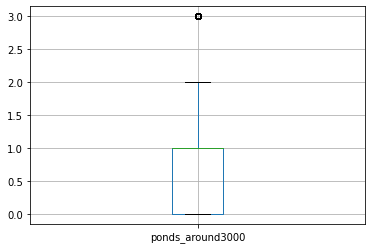

In [16]:
print(data['ponds_around3000'].describe())
data.boxplot('ponds_around3000')
print(data.sort_values('ponds_around3000', ascending = False).head(20))

count    23699.000000
mean       479.210135
std        174.886577
min         13.000000
25%        455.000000
50%        455.000000
75%        455.000000
max       1344.000000
Name: ponds_nearest, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
20726             7     3250000        35.0           2018-08-30      1   
19138            20     4200000        39.9           2017-10-27      1   
19924            20     4300000        64.7           2016-08-21      2   
1476              4     6950000        66.7           2018-11-14      3   
12054            16     8800000        89.0           2018-10-11      3   
18396             4     3650000        40.0           2017-11-10      1   
21454            15    20300000       130.0           2017-12-07      3   
14927            14     4150000        44.4           2016-08-16      2   
20509             4     3350000        44.0           2016-03-29      2   
4122              0     7250000       

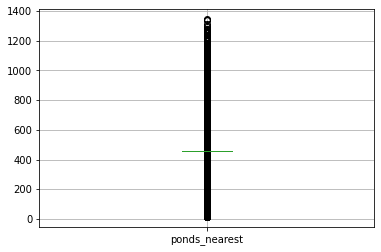

In [17]:
print(data['ponds_nearest'].describe())
data.boxplot('ponds_nearest')
print(data.sort_values('ponds_nearest', ascending = False).head(20))

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
14498             6    32250000       374.6           2018-06-09     19   
18848             6    28500000       270.0           2015-03-02     16   
5358             20    65000000       590.0           2019-02-14     15   
20829             6    28659000       245.4           2016-03-31     14   
866               5    25000000       363.0           2017-12-23     14   
19540             8   420000000       900.0           2017-12-06     12   
9688              8    33000000       194.1           2017-02-07     11   
648               3    17500000       183.7           2018-07-01     11   
18119             4    15500000       216.1           2016-07-04     10   
4149              6    23000000       272.6   

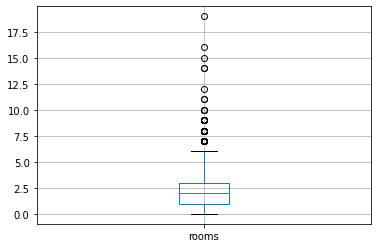

In [18]:
print(data['rooms'].describe())
data.boxplot('rooms')
print(data.sort_values('rooms', ascending = False).head(20))
print(data.query('rooms < 5 and rooms > 0').sort_values('rooms', ascending = False).head(10))

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
19540             8   420000000      900.00           2017-12-06     12   
12859            20   140000000      631.20           2019-04-09      7   
3117             19   140000000      631.00           2019-03-30      7   
15651            20   300000000      618.00           2017-12-18      7   
5358             20    65000000      590.00           2019-02-14     15   
4237              1    50000000      517.00           2017-10-14      7   
8018             20    84000000      507.00           2015-12-17      5   
5893              3   230000000      500.00           2017-05-31      6   
15016             8   150000000      500.00           2016-01-13      4   
12401            20    91500000      495.

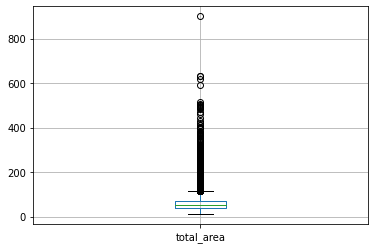

In [19]:
print(data['total_area'].describe())
data.boxplot('total_area')
print(data.sort_values('total_area', ascending = False).head(20))
print(data.query('total_area < 155 and total_area > 30').sort_values('total_area', ascending = False).head(10))

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
12667            50    20500000        76.0           2017-12-10      3   
9778             50    11000000        87.0           2017-10-25      2   
17396            50    14500000       119.7           2017-12-02      4   
15157            42    17998000       138.6           2017-09-27      4   
1058             39     1900000        63.0           2017-09-29      3   
21199            37    11500000        65.7           2018-02-01      2   
10523            35    17000000        90.0           2017-11-10      3   
308              35     5700000        83.9           2018-02-01      3   
99               32     9600000        90.0           2017-09-26      4   
21076            32     8300000        

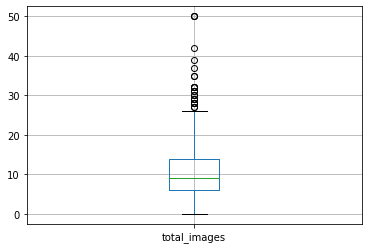

In [20]:
print(data['total_images'].describe())
data.boxplot('total_images')
print(data.sort_values('total_images', ascending = False).head(20))
print(data.query('total_images < 15 and total_images > 0').sort_values('total_images', ascending = False).head(10))

In [21]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [22]:
for i in data['ceiling_height']:
    if i > 25:
        data['ceiling_height'] = i / 10

print(data['ceiling_height'].head(10))        

0    3.2
1    3.2
2    3.2
3    3.2
4    3.2
5    3.2
6    3.2
7    3.2
8    3.2
9    3.2
Name: ceiling_height, dtype: float64


Добавил проверку на высоту потолков

In [23]:
print(data.duplicated().sum()) 

0


В этом раделе я сделал предобработку данных: изучил пропущенные значения в столбцах, рассмотрел типы данных в каждом столбце, в некоторых столбцах тип данных был изменён, например в столбце с датой и временем. Далее я нашёл уникальные значения в столбце с названиями и устранил неявные дубликаты.

### Посчитайте и добавьте в таблицу новые столбцы

In [24]:
data['price'] = data['last_price'] / data['total_area']
data['day'] = pd.to_datetime(data['first_day_exposition']).dt.day
data['month'] = pd.to_datetime(data['first_day_exposition']).dt.month
data['year'] = pd.to_datetime(data['first_day_exposition']).dt.year
data['distance'] = data['cityCenters_nearest'] / 1000
data['distance'] = data['distance'].round()
data['sr_km'] = data['last_price'] / data['distance']

data.loc[data['floor'] == 1, 'floor_o'] = 'первый'
data.loc[(data['floor'] == data['floors_total']) & (data['floor'] != 1), 'floor_o'] = 'последний'
data.loc[data['floor_o'].isna(), 'floor_o'] = 'другой'

### Проведите исследовательский анализ данных

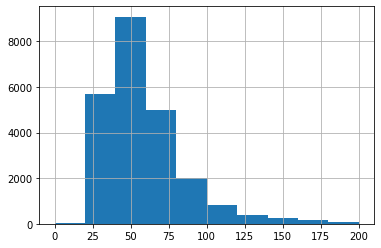

In [25]:
data['total_area'].hist(range=(0, 200))
plt.show()

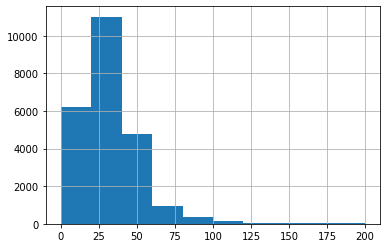

In [27]:
data['living_area'].hist(range=(0, 200))
plt.show()

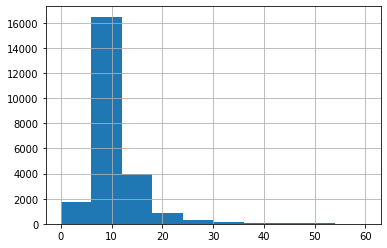

In [28]:
data['kitchen_area'].hist(range=(0, 60))
plt.show()

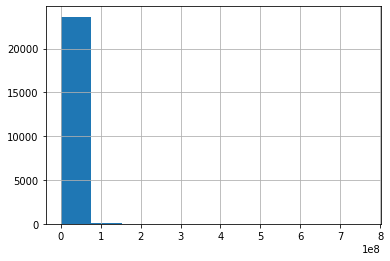

In [29]:
data['last_price'].hist(bins=10)
plt.show()

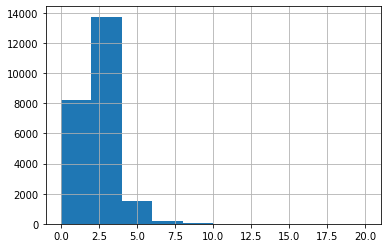

In [30]:
data['rooms'].hist(range=(0, 20))
plt.show()

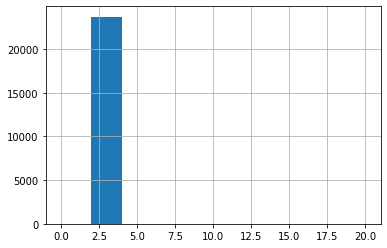

In [31]:
data['ceiling_height'].hist(range=(0, 20))
plt.show()

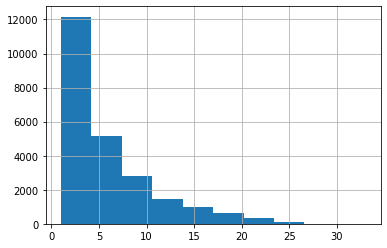

In [32]:
data['floor'].hist()
plt.show()

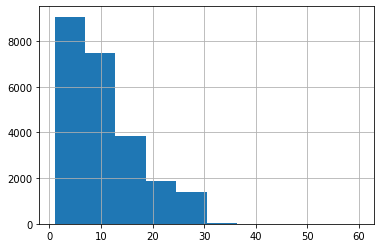

In [33]:
data['floors_total'].hist()
plt.show()

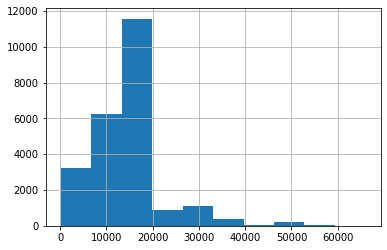

In [34]:
data['cityCenters_nearest'].hist()
plt.show()

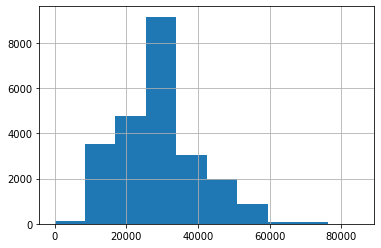

In [35]:
data['airports_nearest'].hist()
plt.show()

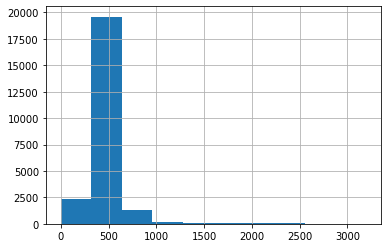

In [36]:
data['parks_nearest'].hist()
plt.show()

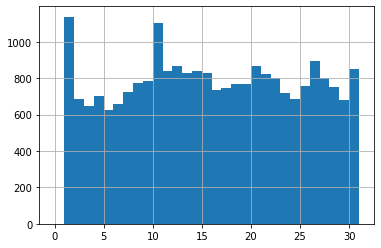

In [37]:
data['day'].hist(bins=31, range=(0, 31))
plt.show()

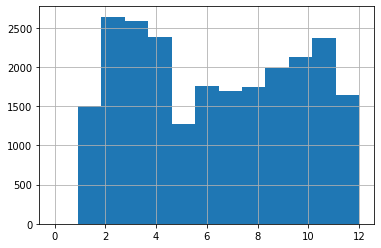

In [37]:
data['month'].hist(bins=13, range=(0, 12))
plt.show()

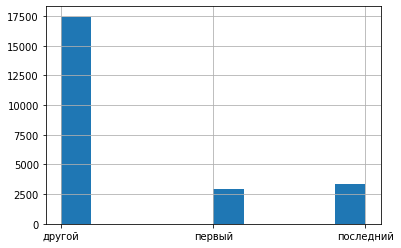

In [38]:
data['floor_o'].hist()
plt.show()

In [39]:
data['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

#Опишите все ваши наблюдения
#Cудя по гистрамме общей площади квартиры, можно сделать вывод, что больше половины квартир имеют площадь 50 кв м
#По гистограмме жилой площади можно заметить, что большинство квартир имеют жилую площадь от 25 до 50 кв м 
#Самая распространённая площадь кухонь в датасете - 10 кв м
#Cамая распространённая высота потолков - 2,5 м
#Квартиры в массе своей продаются на нижних этажах, возможно это потому, что квартиры продающиеся на нижних этажах дешевее, чем на верхнем, от этого высок спрос на квартиры, расположенные на нижних этажах    
#большинство зданий, в которых продаются квартиры по этажности не превышают 20 этажей, можно увидеть зависимость - чем больше этажей в здании, тем меньше таких зданий  
#Большиство продаваемых квартир продавались в пределах до 20 км от центра города, это может говорить о том, что Большиство продаваемых квартир находится в санкт-петербурге
#Большиство продаваемых квартир имеют в пешей доступности парки - 500 м

#Чаще всего продажа квартиры занимала до 200 дней

Медиана = 95.0
Среднее = 169.36022616988058


<AxesSubplot:>

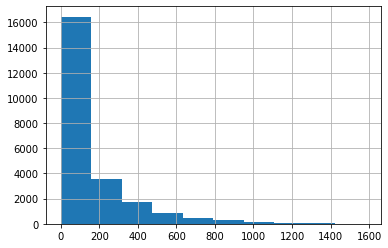

In [40]:
days_med = data['days_exposition'].median()
days_mean = data['days_exposition'].mean()
print('Медиана =', days_med)
print('Среднее =', days_mean)

data['days_exposition'].hist()

              last_price
total_area              
30.10       2.461450e+06
30.11       2.500000e+06
30.12       3.405000e+06
30.20       2.686353e+06
30.26       2.930000e+06
30.30       2.887174e+06
30.34       2.800000e+06
30.35       3.200000e+06
30.40       2.650792e+06
30.43       3.100000e+06
30.50       2.821853e+06
30.53       3.000000e+06
30.60       2.845870e+06
30.61       3.000000e+06
30.64       2.595358e+06
-------------
0.6536750579657242


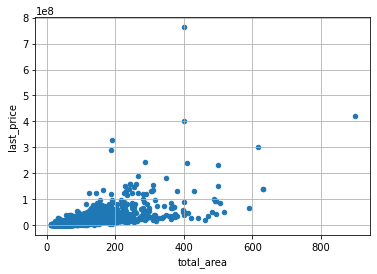

In [41]:
new_table_a = data.query('total_area < 155 and total_area > 30').pivot_table(index='total_area', values = 'last_price')
print(new_table_a.head(15))
data.plot(x='total_area', y='last_price', kind='scatter', grid=True)

print('-------------')
print(data['total_area'].corr(data['last_price']))

Зависимость между общей площадью и ценой квартиры достаточно высока и равна 0,65

               last_price
living_area              
25.100000    1.462500e+07
25.200000    4.457556e+06
25.300000    4.399311e+06
25.380000    4.540000e+06
25.400000    4.541111e+06
25.410000    3.950000e+06
25.440000    1.509300e+07
25.500000    4.850474e+06
25.600000    5.851111e+06
25.700000    3.526556e+06
25.800000    3.368842e+06
25.810000    4.600000e+06
25.900000    3.766250e+06
25.900002    2.401200e+06
25.950000    4.128115e+06
-------------
0.5406588415034878


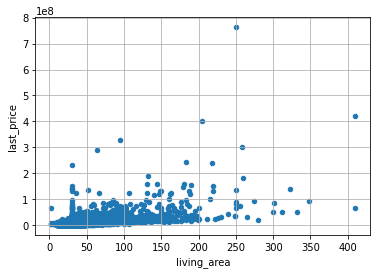

In [42]:
new_table_b = data.query('living_area < 150 and living_area > 25').pivot_table(index='living_area', values = 'last_price')
print(new_table_b.head(15))
data.plot(x='living_area', y='last_price', kind='scatter', grid=True)

print('-------------')
print(data['living_area'].corr(data['last_price']))

Корреляция равна 0,54. Это значит, что зависимость между данными есть, но она небольшая.

                last_price
kitchen_area              
3.2           6.000000e+06
3.3           3.900000e+06
3.4           3.700000e+06
3.5           4.431250e+06
3.7           1.494800e+07
3.8           2.663333e+06
4.0           3.334760e+06
4.1           3.336667e+06
4.2           2.762667e+06
4.3           2.400000e+06
4.4           1.800000e+06
4.5           2.980000e+06
4.6           2.252500e+06
4.7           2.525000e+06
4.8           3.381818e+06
-------------
0.44031561243446554


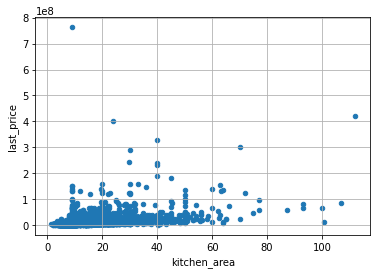

In [43]:
new_table_c = data.query('kitchen_area < 25 and kitchen_area > 3').pivot_table(index='kitchen_area', values = 'last_price')
print(new_table_c.head(15))
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True)

print('-------------')
print(data['kitchen_area'].corr(data['last_price']))

Корреляция равна 0,44. Это значит, что зависимость между данными есть, но она небольшая.

         last_price
rooms              
1      3.835362e+06
2      5.591605e+06
3      8.179119e+06
4      1.342350e+07


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

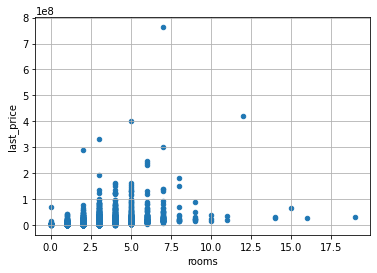

In [44]:
new_table_d = data.query('rooms < 5 and rooms > 0').pivot_table(index='rooms', values = 'last_price')
print(new_table_d.head(15))
data.plot(x='rooms', y='last_price', kind='scatter', grid=True)


         last_price
floor              
1      4.803560e+06
2      6.162038e+06
3      6.731822e+06
4      7.136267e+06
5      6.617043e+06
6      7.547030e+06
7      7.909067e+06
8      6.824281e+06
9      6.310004e+06
10     7.674086e+06
11     6.489882e+06
12     6.692638e+06
13     6.407637e+06
14     6.218935e+06
15     6.428969e+06


<AxesSubplot:xlabel='floor', ylabel='last_price'>

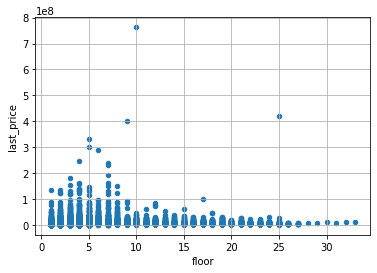

In [45]:
new_table_e = data.pivot_table(index='floor', values = 'last_price')
print(new_table_e.head(15))
data.plot(x='floor', y='last_price', kind='scatter', grid=True)


                        last_price
first_day_exposition              
2014-11-27            1.396084e+07
2014-11-29            5.500000e+06
2014-12-04            3.960875e+06
2014-12-05            1.300000e+06
2014-12-08            6.978625e+06
2014-12-09            1.892943e+07
2014-12-10            9.319542e+06
2014-12-11            1.495945e+07
2014-12-12            7.475000e+06
2014-12-13            6.500000e+06
2014-12-14            5.957500e+06
2014-12-15            8.441667e+06
2014-12-16            6.800000e+06
2014-12-17            1.200000e+07
2014-12-18            7.500000e+06


<AxesSubplot:xlabel='first_day_exposition', ylabel='last_price'>

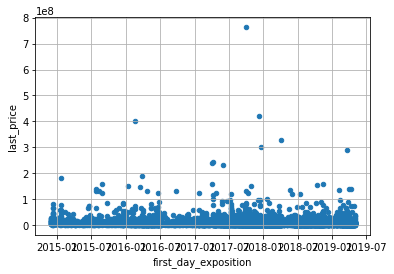

In [46]:
new_table_f = data.pivot_table(index='first_day_exposition', values = 'last_price')
print(new_table_f.head(15))
data.plot(x='first_day_exposition', y='last_price', kind='scatter', grid=True)


             last_price
floor_o                
другой     6.675444e+06
первый     4.803560e+06
последний  7.361025e+06


<AxesSubplot:xlabel='floor_o', ylabel='last_price'>

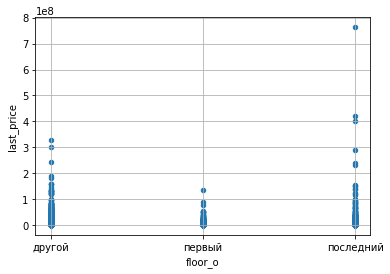

In [47]:
new_table_g = data.pivot_table(index='floor_o', values = 'last_price')
print(new_table_g.head(15))
data.plot(x='floor_o', y='last_price', kind='scatter', grid=True)

       last_price
day              
1    6.355796e+06
2    6.369449e+06
3    5.866715e+06
4    7.250837e+06
5    5.812075e+06
6    6.208446e+06
7    6.183733e+06
8    6.029106e+06
9    7.228031e+06
10   7.268153e+06
11   6.264008e+06
12   6.734095e+06
13   6.467086e+06
14   6.148403e+06
15   6.108656e+06


<AxesSubplot:xlabel='day', ylabel='last_price'>

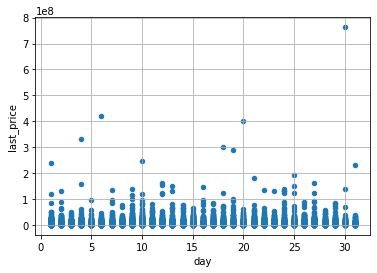

In [48]:
new_table_h = data.pivot_table(index='day', values = 'last_price')
print(new_table_h.head(15))
data.plot(x='day', y='last_price', kind='scatter', grid=True)


         last_price
month              
1      6.668233e+06
2      6.468500e+06
3      6.359275e+06
4      6.737198e+06
5      6.600435e+06
6      6.310269e+06
7      6.649337e+06
8      6.350233e+06
9      6.825470e+06
10     6.235013e+06
11     6.461363e+06
12     7.011731e+06


<AxesSubplot:xlabel='month', ylabel='last_price'>

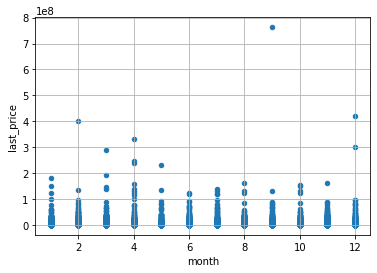

In [49]:
new_table_i = data.pivot_table(index='month', values = 'last_price')
print(new_table_i.head(15))
data.plot(x='month', y='last_price', kind='scatter', grid=True)


        last_price
year              
2014  1.208714e+07
2015  8.572833e+06
2016  6.827912e+06
2017  6.585729e+06
2018  5.950966e+06
2019  6.782388e+06


<AxesSubplot:xlabel='year', ylabel='last_price'>

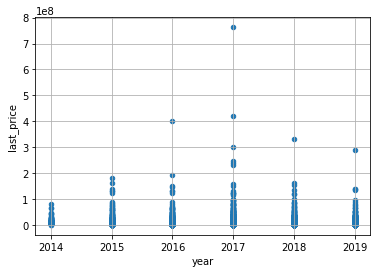

In [50]:
new_table_j = data.pivot_table(index='year', values = 'last_price')
print(new_table_j.head(15))
data.plot(x='year', y='last_price', kind='scatter', grid=True)


In [73]:
data_new = data.groupby('locality_name').agg({'total_area':'count', 'last_price':'median'}).sort_values(by='total_area', ascending=False).head(10)
print(data_new)

                   total_area  last_price
locality_name                            
Санкт-Петербург         15721   5500000.0
Мурино                    590   3400000.0
Кудрово                   472   3890000.0
посёлок Шушары            440   3950000.0
Всеволожск                398   3450000.0
Пушкин                    369   5180000.0
Колпино                   338   3600000.0
посёлок Парголово         327   4100000.0
Гатчина                   307   3100000.0
Выборг                    237   2897000.0


                distance
sr_km                   
1354.444444     9.000000
83333.333333   27.000000
84482.758621   29.000000
87500.000000   16.000000
90434.782609   23.000000
91260.869565   23.000000
94670.111111   18.000000
96428.571429   14.000000
96875.000000   16.000000
97434.782609   23.000000
100000.000000  20.666667
102173.913043  23.000000
102272.727273  22.000000
104800.000000  25.000000
107000.000000  24.000000


array([[<AxesSubplot:title={'center':'distance'}>]], dtype=object)

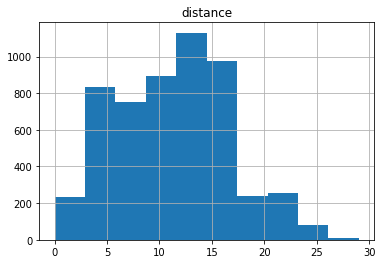

In [63]:
new_table_u = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='sr_km', values = 'distance')
print(new_table_u.head(15))
new_table_u.hist()

### Общий вывод

В данном проекте был проведён анализ продажи недвижимости в С-Пб и его пригородов. Были отредактиованы пропуски в некоторых столбцах, где-то вместо пропусков были медианные значения, где то нули. Далее были исправлены дубликаты в названиях нп. Судя по построенным гистограммам я могу сделать вывод, что большинство квартир продаются не больше чем через 200 дней, что говорит о высоком спросе людей на покупку недвижимости. Цена, судя по диаграммам рассеяности, зависит от общей площади квартиры, от жилой площади, от количества комнат и этажа зависимость слабая. Также, есть наблюдение, что в первой десятке по количеству объявлений находятся пригороды Санкт-Петербурга, а цена за 1 кв метр зависит от отдалённости квартиры от С-Пб, чем дальше от центра, тем дешевле квартира.